# model analysis

Analysis of RMSE for various bucketing models with all combinations of both `season_bins` and `game_bins` in the range 2-6.

In [188]:
import json

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

from lombardi import analysis

## load in model results

Model results were generated using the following code. It takes a few minutes to run so I'm loading it in from json instead.

```python
import json

model_results = []

for sb in range(2,7):
    for gb in range(2,7):
        print('{} | {}'.format(sb,gb))
        model_results.append(dict(
            season_buckets=sb,
            game_buckets=gb,
            results=analysis.analyze(season_bins=sb, game_bins=gb),
        ))        

with open('/Users/ryan.tuck/Desktop/model_results.json', 'w') as f:
    json.dump(model_results, f, indent=4, sort_keys=True)
```



In [189]:
with open('/Users/ryan.tuck/Desktop/model_results.json') as f:
    model_results = json.load(f)

### season, game buckets = 2,2

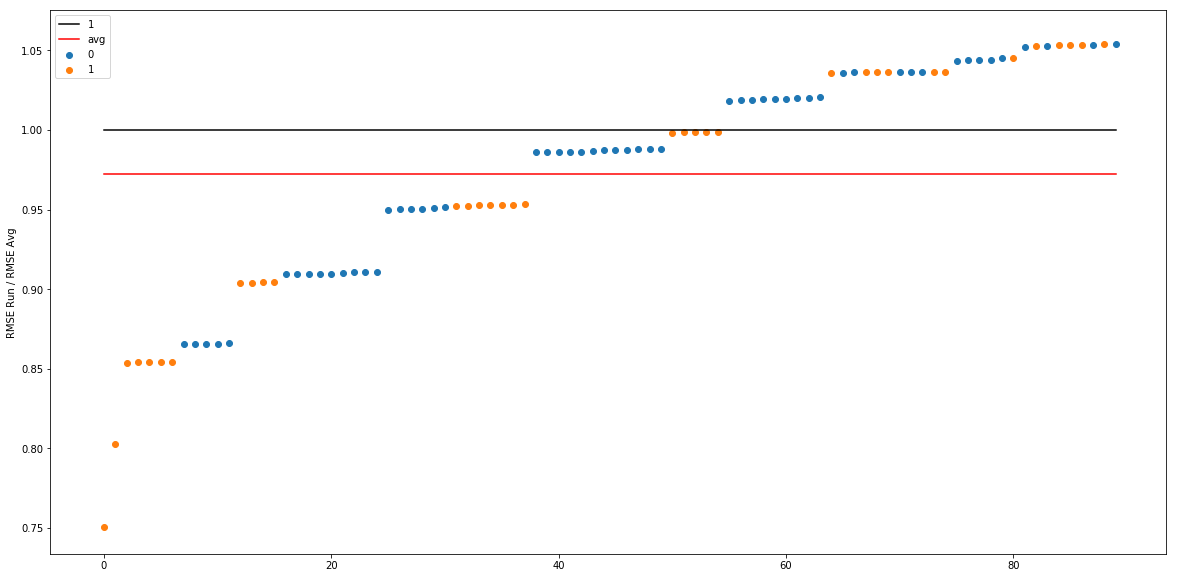

In [190]:
analysis.sorted_rmse_ratio_scatter(model_results[0]['results'])

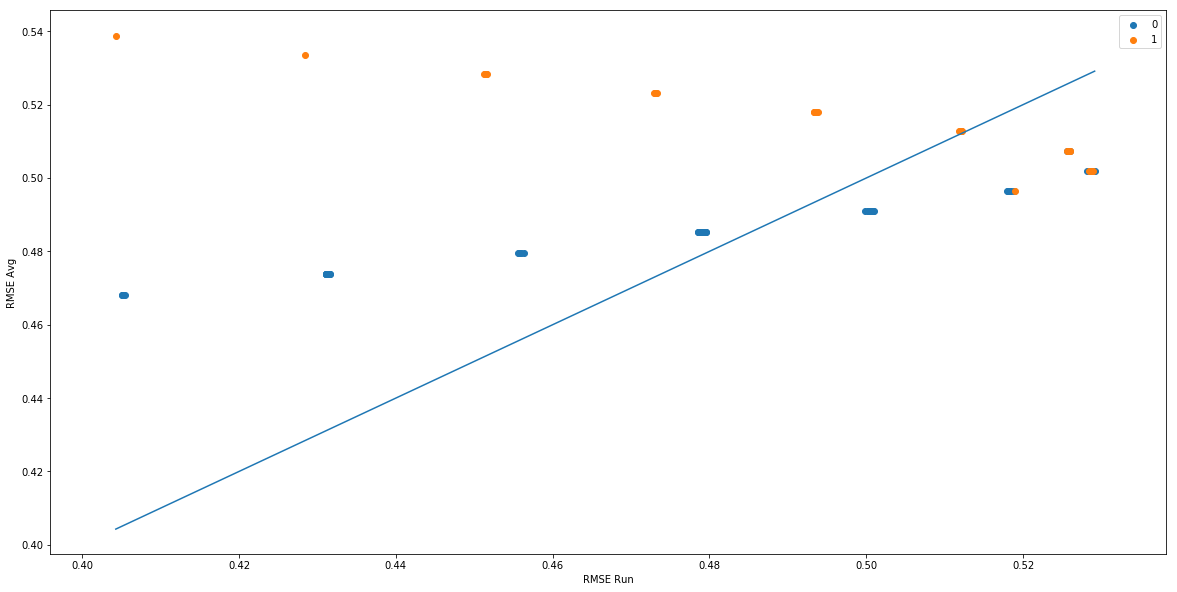

In [191]:
analysis.rmse_scatter(model_results[0]['results'])

###  season, game buckets = 6,6

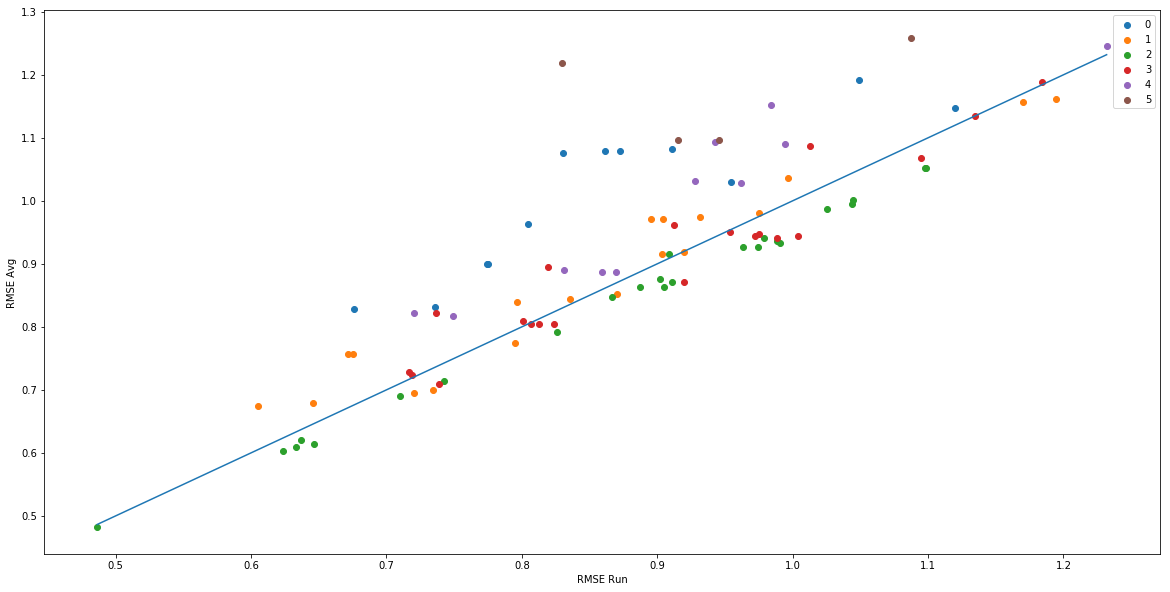

In [192]:
analysis.rmse_scatter(model_results[-1]['results'])

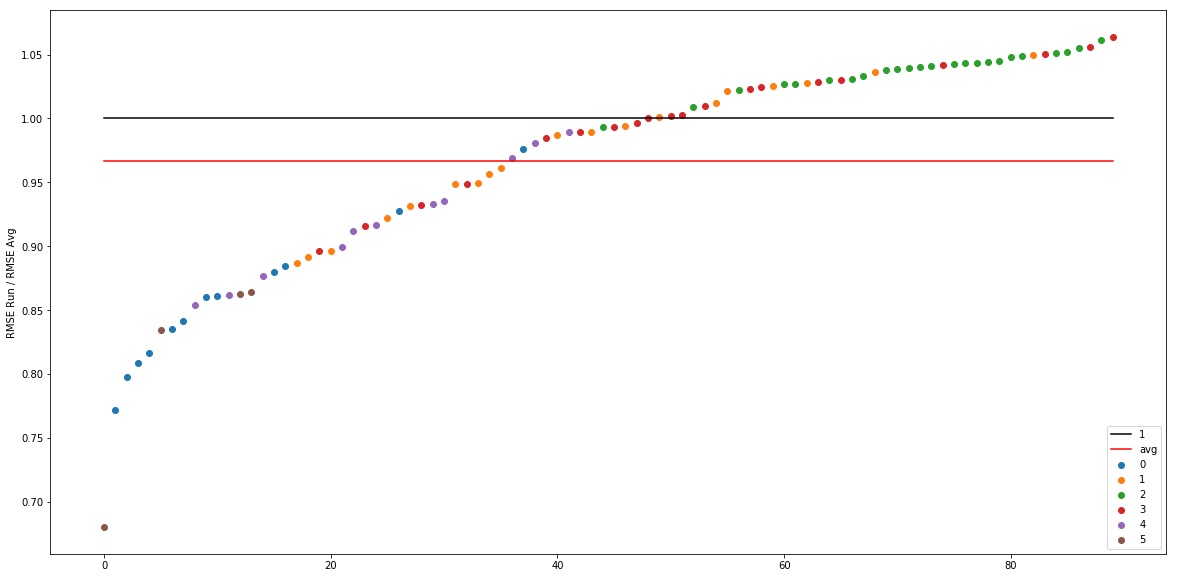

In [193]:
analysis.sorted_rmse_ratio_scatter(model_results[-1]['results'])

### average RMSE ratios for all models

In [175]:
avg_ratios = [
    dict(
        season_bucket=r['season_buckets'],
        game_bucket=r['game_buckets'],
        avg_ratio=r['results']['rmse_analysis']['overall']['avg_ratio'],
    )
    for r in model_results
]

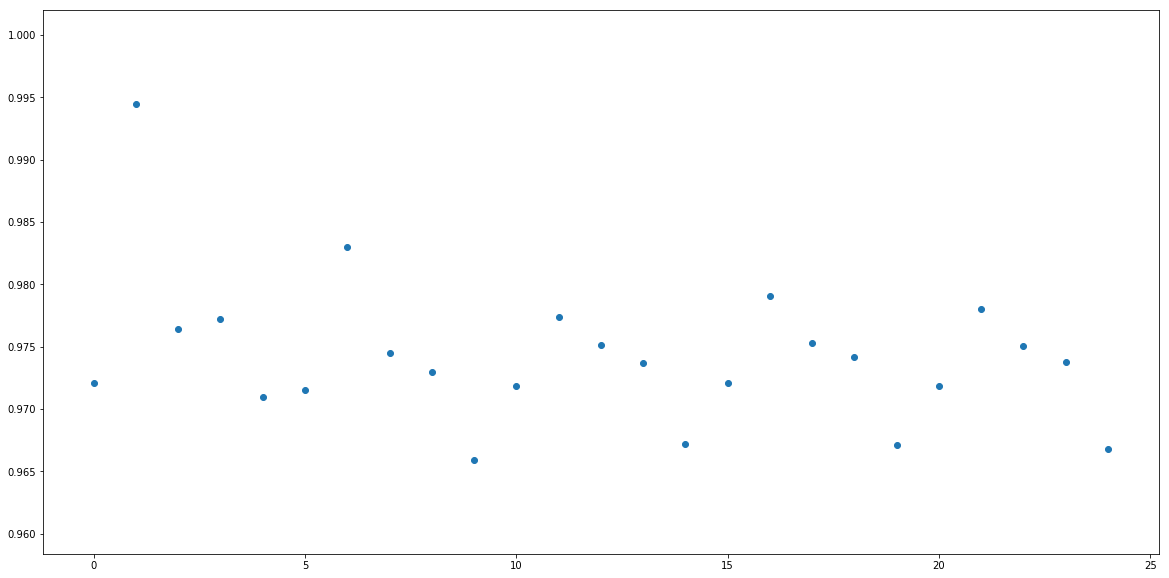

In [177]:
plt.scatter(range(len(avg_ratios)), [x['avg_ratio'] for x in avg_ratios])

### 3 season buckets, 10 game buckets

In [180]:
r_3_10 = analysis.analyze(3,10)

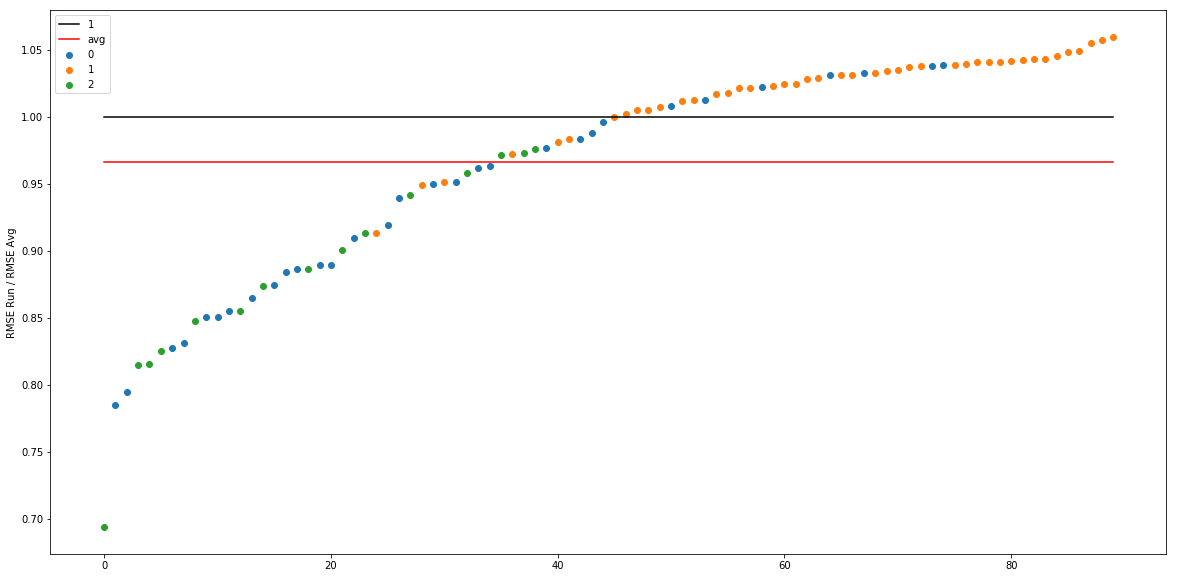

In [181]:
analysis.sorted_rmse_ratio_scatter(r_3_10)